In [1]:
import pandas as pd
from scipy.stats import entropy
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
lcquad = pd.read_csv("../../data/UnifiedSubclassDBpedia/LC-QuAD-train.csv", sep=';')
qald = pd.read_csv("../../data/UnifiedSubclassDBpedia/QALD-train.csv", sep=';')
cogcomp = pd.read_csv("../../data/UnifiedSubclassDBpedia/CogComp-train.csv", sep=';')
webq = pd.read_csv("../../data/UnifiedSubclassDBpedia/WebQuestions-train.csv", sep=';')
simpleq = pd.read_csv("../../data/UnifiedSubclassDBpedia/SimpleQuestions-train.csv", sep=';')

lcquad_ = pd.read_csv("../../data/UnifiedSubclassDBpedia/LC-QuAD-test.csv", sep=';')
qald_ = pd.read_csv("../../data/UnifiedSubclassDBpedia/QALD-test.csv", sep=';')
cogcomp_ = pd.read_csv("../../data/UnifiedSubclassDBpedia/CogComp-test.csv", sep=';')
webq_ = pd.read_csv("../../data/UnifiedSubclassDBpedia/WebQuestions-test.csv", sep=';')
simpleq_ = pd.read_csv("../../data/UnifiedSubclassDBpedia/SimpleQuestions-test.csv", sep=';')

train_datasets = [lcquad, qald, cogcomp, webq, simpleq]
test_datasets = [lcquad_, qald_, cogcomp_, webq_, simpleq_]
dataset_names = ['LC-QuAD', 'QALD', 'TREC', 'WebQuestions', 'SimpleQuestions']

In [3]:
class_names = list(set(list(lcquad.type.unique()) + \
                list(qald.type.unique()) + \
                list(cogcomp.type.unique()) + \
                list(webq.type.unique()) + \
                list(simpleq.type.unique())))

print(len(class_names))

31


In [4]:
def get_distributions(datasets):
    distributions = list()
    for ds in datasets:
        ds_dict = {key: 0.0000000000000001 for key in class_names}

        for cls in class_names:
            if cls in ds.type.unique():
                cls_prob = ds[ds.type == cls].shape[0]/ds.shape[0]
                ds_dict[cls] = cls_prob

        distributions.append(ds_dict)
    return distributions

In [5]:
train_distributions = get_distributions(train_datasets)
test_distributions = get_distributions(test_datasets)

In [6]:
matrix = list()
for i in range(len(train_distributions)):
    print('>>>', dataset_names[i])
    row = list()
    for j in range(len(test_distributions)):
        q, p = list(train_distributions[i].values()), list(test_distributions[j].values())
        kl_div = entropy(pk=p, qk=q)
        row.append(kl_div)
        print('-', dataset_names[j], '=', kl_div)
    matrix.append(row)

>>> LC-QuAD
- LC-QuAD = 0.030781028522205225
- QALD = 3.466993515875522
- TREC = 2.8061742056807213
- WebQuestions = 3.7743725064804794
- SimpleQuestions = 1.6449862495238898
>>> QALD
- LC-QuAD = 0.9960256663600456
- QALD = 0.40678889355141196
- TREC = 1.160105766473638
- WebQuestions = 0.7738331252208438
- SimpleQuestions = 1.5792715102876733
>>> TREC
- LC-QuAD = 7.104581091966337
- QALD = 1.2296487727070313
- TREC = 0.013898904550896738
- WebQuestions = 1.0296454832259674
- SimpleQuestions = 1.4333302708225326
>>> WebQuestions
- LC-QuAD = 7.078097129226625
- QALD = 1.4080109518339612
- TREC = 1.0899438921065134
- WebQuestions = 0.012033880566751004
- SimpleQuestions = 0.23610305688939903
>>> SimpleQuestions
- LC-QuAD = 16.319817360779474
- QALD = 11.62967599867662
- TREC = 17.126709879529262
- WebQuestions = 4.6075088529830195
- SimpleQuestions = 0.002238770684243954


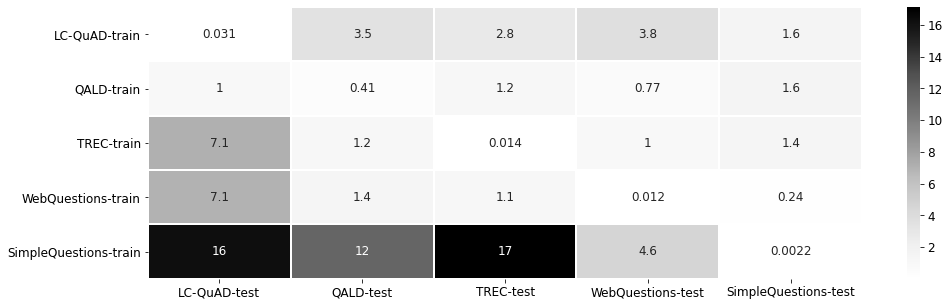

In [8]:
plt.rcParams["figure.figsize"] = [16,5]
plt.rcParams["font.size"] = 12

ax = sns.heatmap(
    np.array(matrix),
    linewidths=1,
    annot=True,
    xticklabels=[name + '-test' for name in dataset_names],
    yticklabels=[name + '-train' for name in dataset_names],
    cmap="Greys"
)

plt.show()